# DATASET

In [1]:
from monty.serialization import loadfn, MontyDecoder,MontyEncoder
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import json,math,os
import numpy as np
import pandas as pd
import pprint

In [2]:
dat_3d = loadfn('jdft_3d-12-12-2022.json',cls=MontyDecoder)

In [3]:
print(len(dat_3d))

75993


In [4]:
dat_3d[0]

{'jid': 'JVASP-90856',
 'spg_number': '129',
 'spg_symbol': 'P4/nmm',
 'formula': 'TiCuSiAs',
 'formation_energy_peratom': -0.42762,
 'func': 'OptB88vdW',
 'optb88vdw_bandgap': 0.0,
 'atoms': {'lattice_mat': [[3.566933224304235, 0.0, -0.0],
   [0.0, 3.566933224304235, -0.0],
   [-0.0, -0.0, 9.397075454186664]],
  'coords': [[2.6751975000000003, 2.6751975000000003, 7.376101754328542],
   [0.8917325, 0.8917325, 2.0209782456714573],
   [0.8917325, 2.6751975000000003, 4.69854],
   [2.6751975000000003, 0.8917325, 4.69854],
   [0.8917325, 2.6751975000000003, 0.0],
   [2.6751975000000003, 0.8917325, 0.0],
   [2.6751975000000003, 2.6751975000000003, 2.8894795605846353],
   [0.8917325, 0.8917325, 6.507600439415366]],
  'elements': ['Ti', 'Ti', 'Cu', 'Cu', 'Si', 'Si', 'As', 'As'],
  'abc': [3.56693, 3.56693, 9.39708],
  'angles': [90.0, 90.0, 90.0],
  'cartesian': True,
  'props': ['', '', '', '', '', '', '', '']},
 'slme': 'na',
 'magmom_oszicar': 0.0,
 'spillage': 'na',
 'elastic_tensor': 'na'



**form_enp**: formation energy per atom (eV/atom),

**op_gap**  : OptB88vdW functional based bandgap (eV),

**mbj_ga**p : TBmBJ functional based bandgap (eV),

**kv**      : Voigt bulk mod. (GPa),

**gv**      : Shear bulk mod. (GPa),

**elastic** : elastic tensor instring format, use the function 'get_et' to convert into pymatgen elastictensor object,

**epsx**    : Static dielctric function value in x-direction based on OptB88vdW (no unit),

**mepsx**   : Static dielctric function value in x-direction based on TBmBJ (no unit),

**magmom**  : Magnetic moment (Bohr magneton) (from OUTCAR and from OSZICAR), generally OSZICAR value is preferred, no DFT+U,

**kp_len**  : Kpoint automatic line density obtained after automatic convergence (Angstrom), substract 25 because 5 extra points,

**encut**   : Plane wave cut-off value obtained after automatic convergence,

**exfoliation_en**: exfoliation energy,

**phi**     : 2D work-function related values,

**final_str**: final structure after relaxation with OptB88vdW,

**eff_mass**: effective mass with BoltzTrap at 300K,

**spillage**: spin-orbit spillage as measure of band-inversion.
Here 'na' signifies non-available data# Each element in the data is a key-value pair based dictionary.




In [5]:
jid, formula, ehull, optb88vdw_bandgap, atoms, url =[],[],[],[],[],[]

for idx,i in enumerate(dat_3d):
    if idx<7000:
      jid.append(i['jid'])
      formula.append(i['formula'])
      ehull.append(float(i['ehull']))
      optb88vdw_bandgap.append(float(i['optb88vdw_bandgap']))
      atoms.append(i['atoms'])
      url.append(str("https://www.ctcms.nist.gov/~knc6/jsmol/")+str(i['jid'])+str(".html"))

In [6]:
df = pd.DataFrame([jid, formula, ehull, optb88vdw_bandgap, atoms, url])
df = df.transpose()
headers = ['jid', 'formula', 'ehull', 'optb88vdw_bandgap', 'atoms', 'url']
df.columns = headers

In [7]:
df.head()

,jid,formula,ehull,optb88vdw_bandgap,atoms,url
0,JVASP-90856,TiCuSiAs,0.0423,0.0,"{'lattice_mat': [[3.566933224304235, 0.0, -0.0...",https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-9...
1,JVASP-86097,DyB6,0.0456,0.0,"{'lattice_mat': [[4.089078911208881, 0.0, 0.0]...",https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-8...
2,JVASP-64906,Be2OsRu,0.3183,0.0,"{'lattice_mat': [[-1.833590720595598, 1.833590...",https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-6...
3,JVASP-98225,KBi,0.0,0.472,"{'lattice_mat': [[7.2963518353359165, 0.0, 0.0...",https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-9...
4,JVASP-10,VSe2,0.0156,0.0,"{'lattice_mat': [[1.6777483798834445, -2.90594...",https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-1...


In [8]:
from sklearn.preprocessing import StandardScaler

cols = ['jid','formula','atoms','url']

def clean_data(df,cols):
    df_dropped = df.drop(columns=cols).astype('float16')
    scaler = StandardScaler()
    standard = scaler.fit_transform(df_dropped)
    df_std = pd.DataFrame(standard, columns = df_dropped.columns, index= df_dropped.index )
    return df_std, scaler.mean_, scaler.scale_

df_clean, mean, scale = clean_data(df.copy(),cols)
df_non_numeric = df[cols]  
df_final = pd.concat([df_clean, df_non_numeric], axis=1)

df_final = df_final[df.columns]
df_final.head()

,jid,formula,ehull,optb88vdw_bandgap,atoms,url
0,JVASP-90856,TiCuSiAs,-0.617188,-0.445312,"{'lattice_mat': [[3.566933224304235, 0.0, -0.0...",https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-9...
1,JVASP-86097,DyB6,-0.609863,-0.445312,"{'lattice_mat': [[4.089078911208881, 0.0, 0.0]...",https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-8...
2,JVASP-64906,Be2OsRu,-0.032471,-0.445312,"{'lattice_mat': [[-1.833590720595598, 1.833590...",https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-6...
3,JVASP-98225,KBi,-0.706543,-0.103760,"{'lattice_mat': [[7.2963518353359165, 0.0, 0.0...",https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-9...
4,JVASP-10,VSe2,-0.673340,-0.445312,"{'lattice_mat': [[1.6777483798834445, -2.90594...",https://www.ctcms.nist.gov/~knc6/jsmol/JVASP-1...


ehull - Skewness: 0.6491199223703258, Kurtosis: -1.0354592591748184


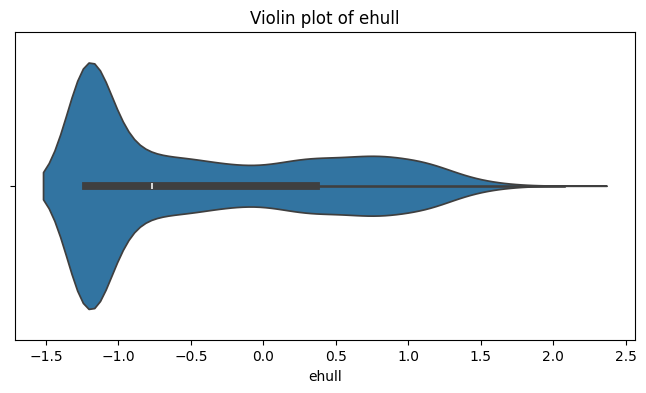

optb88vdw_bandgap - Skewness: 1.762853137027173, Kurtosis: 1.6699896218554953


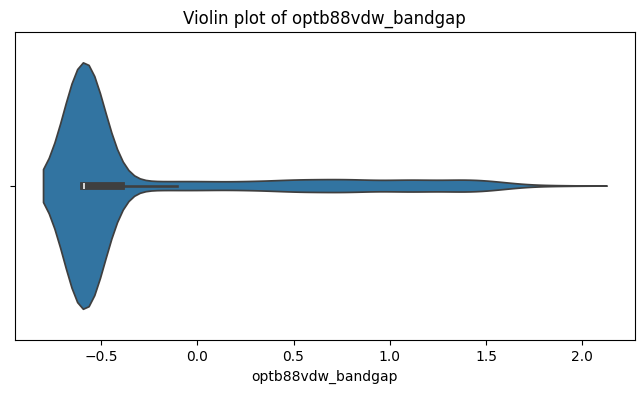

In [9]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

for column in df_final[["ehull","optb88vdw_bandgap"]]:
    col_kurtosis = kurtosis(np.log1p(df_final[column]))
    col_skew = skew(np.log1p(df_final[column]))
    print(f"{column} - Skewness: {col_skew}, Kurtosis: {col_kurtosis}")

    plt.figure(figsize=[8,4])
    sns.violinplot(x=np.log1p(df_final[column]))
    plt.title(f'Violin plot of {column}')
    plt.xlabel(column)
    plt.show()



## atoms to graphs

In [10]:
from jarvis.core.atoms import Atoms
a = Atoms.from_dict(df_final["atoms"][0])
print(a)

System
1.0
3.566933224304235 0.0 -0.0
0.0 3.566933224304235 -0.0
-0.0 -0.0 9.397075454186664
Ti Cu Si As 
2 2 2 2 
direct
0.7500000000000001 0.7500000000000001 0.784935507022239 Ti
0.25 0.25 0.2150644929777609 Ti
0.25 0.7500000000000001 0.5 Cu
0.7500000000000001 0.25 0.5 Cu
0.25 0.7500000000000001 0.0 Si
0.7500000000000001 0.25 0.0 Si
0.7500000000000001 0.7500000000000001 0.3074869598412097 As
0.25 0.25 0.6925130401587904 As



In [11]:
neigh = a.get_neighbors_cutoffs()
neigh

(2.9000000000000004,
 3.4000000000000004,
 array([list([[0, 0, 3.566933224304235, (-1.0, 0.0, 0.0)], [0, 3, 4.80344636496686, (-1.0, 0.0, 0.0)], [0, 5, 4.470804707028549, (-1.0, 0.0, 1.0)], [0, 3, 4.803447562115282, (-1.0, 1.0, 0.0)], [0, 5, 4.470805993248481, (-1.0, 1.0, 1.0)], [0, 0, 3.566933224304235, (0.0, -1.0, 0.0)], [0, 2, 4.80344636496686, (0.0, -1.0, 0.0)], [0, 4, 4.470804707028549, (0.0, -1.0, 1.0)], [0, 2, 3.217154698560195, (0.0, 0.0, 0.0)], [0, 3, 3.217154698560195, (0.0, 0.0, 0.0)], [0, 6, 4.486622193743907, (0.0, 0.0, 0.0)], [0, 7, 2.667543691573939, (0.0, 0.0, 0.0)], [0, 1, 4.764333147715466, (0.0, 0.0, 1.0)], [0, 4, 2.695381624509455, (0.0, 0.0, 1.0)], [0, 5, 2.695381624509455, (0.0, 0.0, 1.0)], [0, 6, 4.910453260442757, (0.0, 0.0, 1.0)], [0, 0, 3.5669332243042353, (0.0, 1.0, 0.0)], [0, 2, 4.80344636496686, (0.0, 1.0, 0.0)], [0, 3, 3.217156485989738, (0.0, 1.0, 0.0)], [0, 7, 2.6675458472786957, (0.0, 1.0, 0.0)], [0, 1, 4.764334354691981, (0.0, 1.0, 1.0)], [0, 4, 4.4708

In [ ]:
import torch
from torch_geometric.data import Data
from ase import Atoms
from ase import neighborlist
from ase.neighborlist import neighbor_list
from jarvis.core.atoms import Atoms

data_list = []
fails = 0

for kk, row in df_final.iterrows():  
    a = Atoms.from_dict(row["atoms"])  
    atoms = a.ase_converter(pbc=True)
    nl = neighborlist.NeighborList(neighborlist.natural_cutoffs(atoms))
    nl.update(atoms)

    atomic_numbers = atoms.get_atomic_numbers()

    try:
        temp_x = torch.tensor(atomic_numbers, dtype=torch.float).unsqueeze(1)
        temp_y = torch.tensor(np.log1p(row["ehull"]), dtype=torch.float)
        temp_pos = torch.tensor(atoms.get_positions(), dtype=torch.float)

        edge_index_list = []
        for i in range(len(atoms)):
            neighbors, offsets = nl.get_neighbors(i)
            for neighbor in neighbors:
                if neighbor != i:
                    edge_index_list.append([i, neighbor])

        # Ensure edge_index_list is not empty
        if len(edge_index_list) > 0:
            temp_edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        else:
            #temp_edge_index = torch.empty((2, 0), dtype=torch.long)
            fails += 1
            print(f"Skipping row {kk} due to no edges.")
            continue  # Skip this data point entirely

        # Ensure valid edge_index before calculating distances
        if temp_edge_index.shape[1] > 0:
            edge_vectors = temp_pos[temp_edge_index[0]] - temp_pos[temp_edge_index[1]]
            temp_edge_attr = torch.norm(edge_vectors, dim=1).unsqueeze(1)
        else:
            #temp_edge_attr = torch.empty((0, 1), dtype=torch.float)
            #fails += 1
            #print(f"Skipping row {kk} due to no edges.")
            continue  # Skip this data point entirely

    except Exception as e:
        fails += 1  # Count the failed samples
        print(f"Skipping row {kk} due to error: {e}")  # Debugging

    # edge_attr - fancier 
    data_list.append(Data(x=temp_x, pos=temp_pos, edge_index=temp_edge_index, edge_attr=temp_edge_attr, y=temp_y))

print(f"Done, failed entries: {fails}")


/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: dlopen(/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/libpyg.so, 0x0006): Symbol not found: __ZN2at23SavedTensorDefaultHooks11set_tracingEb
  Referenced from: <099A1A6E-770C-3A11-8544-8953391DDF70> /Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/libpyg.so
  Expected in:     <1D55FADC-C183-3A6D-AF55-078C17E034B1> /Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: dlopen(/Users/dariomss/Documents/GitHub/Grap

Skipping row 45 due to no edges.
Skipping row 74 due to no edges.
Skipping row 164 due to no edges.
Skipping row 282 due to no edges.
Skipping row 296 due to no edges.
Skipping row 339 due to no edges.
Skipping row 404 due to no edges.
Skipping row 509 due to no edges.
Skipping row 516 due to no edges.
Skipping row 518 due to no edges.
Skipping row 543 due to no edges.
Skipping row 641 due to no edges.
Skipping row 669 due to no edges.
Skipping row 759 due to no edges.
Skipping row 827 due to no edges.
Skipping row 855 due to no edges.
Skipping row 863 due to no edges.
Skipping row 913 due to no edges.
Skipping row 975 due to no edges.
Skipping row 1151 due to no edges.
Skipping row 1235 due to no edges.
Skipping row 1414 due to no edges.
Skipping row 1415 due to no edges.
Skipping row 1431 due to no edges.
Skipping row 1443 due to no edges.
Skipping row 1673 due to no edges.
Skipping row 1676 due to no edges.
Skipping row 1707 due to no edges.
Skipping row 2049 due to no edges.
Skippi

In [13]:
data_point = data_list[0]
print(f'Number of nodes: {data_point.num_nodes}')
print(f'Number of edges: {data_point.num_edges}')
print(f'Average node degree: {data_point.num_edges / data_point.num_nodes:.2f}')
print(f'Has isolated nodes: {data_point.has_isolated_nodes()}')
print(f'Has self-loops: {data_point.has_self_loops()}')
print(f'Is undirected: {data_point.is_undirected()}')

Number of nodes: 8
Number of edges: 40
Average node degree: 5.00
Has isolated nodes: False
Has self-loops: False
Is undirected: False


In [14]:
from torch_geometric.data import Dataset, DataLoader
from torch.utils.data import random_split

class JarvisDataset(Dataset):
    def __init__(self,data_list,transform=None,pre_transform=None):
        super().__init__(transform,pre_transform)
        self.data_list = data_list 

    def len(self):
        return len(self.data_list)
    def get(self,idx):
        return self.data_list[idx]

dataset = JarvisDataset(data_list)
torch.manual_seed(176432)
train_size = int(0.75*len(dataset))
test_size = len(dataset)-train_size

train_dataset = JarvisDataset(dataset[:train_size])
test_dataset = JarvisDataset(dataset[train_size:])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) # Shuffle for training
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False) # Shuffle for training

print(f"Dataset contains {len(dataset)} graphs.")

# for step, data in enumerate(train_loader):
#         print(f'Step {step + 1}:')
#         print('=======')
#         print(f'Number of graphs in the current batch: {data.num_graphs}')
#         print(data)
#         print()

Dataset contains 6942 graphs.


/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


# MODEL

In [74]:
from torch_geometric.nn import GCNConv,global_mean_pool
import torch.nn.functional as F
from torch.nn import Linear

class GCN(torch.nn.Module):
    def __init__(self,hidden_channels):
        super(GCN,self).__init__()
        torch.manual_seed(176432)
        self.conv1 = GCNConv(dataset.num_features,hidden_channels)
        self.conv2 = GCNConv(hidden_channels,hidden_channels)
        self.conv3 = GCNConv(hidden_channels,hidden_channels)
        self.lin = Linear(hidden_channels,1)
    
    def forward(self,x,edge_index,batch):
        x = self.conv1(x,edge_index)
        x = x.relu()
        x = self.conv2(x,edge_index)
        x = x.relu()
        x = self.conv3(x,edge_index)
        x = global_mean_pool(x,batch)
        x = F.dropout(x,p=0.5,training=self.training)
        x = self.lin(x)
        return x

model = GCN(hidden_channels = 16)
optimizer = torch.optim.Adam(model.parameters(),lr=0.001,weight_decay=5e-4)
criterion = torch.nn.MSELoss()

def train():
    model.train()

    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x,data.edge_index,data.batch)
        loss = criterion(out,data.y)
        loss.backward()
        optimizer.step()
        return loss

def test(loader):
    model.eval()

    for data in loader:
        out = model(data.x,data.edge_index,data.batch)
        loss = criterion(out,data.y)
        return loss 

print(model)

GCN(
  (conv1): GCNConv(1, 16)
  (conv2): GCNConv(16, 16)
  (conv3): GCNConv(16, 16)
  (lin): Linear(in_features=16, out_features=1, bias=True)
)


# TRAINING

In [75]:
for epoch in range(1,150):
    train()
    train_loss = test(train_loader)
    test_loss = test(test_loader)
    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f}, Test loss: {test_loss:.4f}')

/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 001, Train loss: 71.2278, Test loss: 97.5400
Epoch: 002, Train loss: 53.2517, Test loss: 85.8140
Epoch: 003, Train loss: 26.3770, Test loss: 75.8852
Epoch: 004, Train loss: 46.1084, Test loss: 66.6417
Epoch: 005, Train loss: 37.5924, Test loss: 58.1809
Epoch: 006, Train loss: 46.5401, Test loss: 51.0650
Epoch: 007, Train loss: 29.1796, Test loss: 44.4059
Epoch: 008, Train loss: 26.8608, Test loss: 38.5197
Epoch: 009, Train loss: 27.2670, Test loss: 33.3494
Epoch: 010, Train loss: 14.0490, Test loss: 28.5173
Epoch: 011, Train loss: 12.2048, Test loss: 24.2845
Epoch: 012, Train loss: 13.1761, Test loss: 20.5492
Epoch: 013, Train loss: 14.4040, Test loss: 17.3019
Epoch: 014, Train loss: 10.5933, Test loss: 14.5886
Epoch: 015, Train loss: 5.8018, Test loss: 12.2549
Epoch: 016, Train loss: 6.1656, Test loss: 10.2357
Epoch: 017, Train loss: 4.0078, Test loss: 8.5313
Epoch: 018, Train loss: 3.2901, Test loss: 7.0733
Epoch: 019, Train loss: 4.3382, Test loss: 5.7792
Epoch: 020, Train lo

# WANDB

In [ ]:
from torch_geometric.nn import GCNConv,global_mean_pool
import torch.nn.functional as F
from torch.nn import Linear
import tqdm

enable_wandb = True
if enable_wandb:
    import wandb
wandb.login()

assert enable_wandb, "W&B not enabled. Please, enable W&B and restart the notebook"

class GCN(torch.nn.Module):
    def __init__(self,hidden_channels):
        super(GCN,self).__init__()
        torch.manual_seed(176432)

        #automatize change in number of layers
        #GCNConv no edges

        self.conv1 = GCNConv(dataset.num_features,hidden_channels)
        self.conv2 = GCNConv(hidden_channels,hidden_channels)
        self.conv3 = GCNConv(hidden_channels,hidden_channels)
        self.lin = Linear(hidden_channels,1)
    
    def forward(self,x,edge_index,batch):
        x = self.conv1(x,edge_index)
        x = x.relu()
        x = self.conv2(x,edge_index)
        x = x.relu()
        x = self.conv3(x,edge_index)
        x = global_mean_pool(x,batch)
        x = F.dropout(x,p=0.5,training=self.training)
        x = self.lin(x)
        return x


def agent_fn():
    wandb.init()

    model = GCN(hidden_channels = wandb.config.hidden_channels)
    wandb.watch(model)

    #with torch.no_grad():
        #out = model(data.x, data.edge_index, data.batch)
        #embedding_to_wandb(out, color=data.y, key="gcn_jarvis/embedding/init")

    optimizer = torch.optim.Adam(model.parameters(), lr=wandb.config.lr, weight_decay=wandb.config.weight_decay)
    criterion = torch.nn.MSELoss()

    def train():
        model.train()
        
        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x,data.edge_index,data.batch)
            loss = criterion(out,data.y)
            loss.backward()
            optimizer.step()
           # return loss

    def test(loader):
        model.eval()

        for data in loader:
            out = model(data.x,data.edge_index,data.batch)
            loss = criterion(out,data.y)
            return loss 

    for epoch in tqdm.tqdm(range(1,750)):
        train()
        train_loss = test(train_loader)
        test_loss = test(test_loader)
        
        train_mse_loss_original = train_loss.detach() * (scale ** 2)
        train_rmse_loss_original = torch.sqrt(train_mse_loss_original.mean())
        
        test_mse_loss_original = test_loss.detach() * (scale ** 2)
        test_rmse_loss_original = torch.sqrt(test_mse_loss_original.mean())

        wandb.log({"gcn_jarvis/train_RMSE": train_rmse_loss_original.item()})
        wandb.log({"gcn_jarvis/test_RMSE": test_rmse_loss_original.item()})

    #model.eval()
    #out = model(data.x, data.edge_index,data.batch)
    #test_loss = test(test_loader)
    #test_mse_loss_original = test_loss.detach() * (scale ** 2)
    #test_rmse_loss_original = torch.sqrt(test_mse_loss_original.mean())
    #wandb.summary["gcn_jarvis/test_RMSE"] = test_rmse_loss_original.item()
    #embedding_to_wandb(out, color=data.y, key="gcn_jarvis/embedding/trained")
    wandb.finish()

In [28]:
sweep_config = {
    "name": "gcn_jarvis-1",
    "method": "bayes",
    "metric": {
        "name": "gcn_jarvis/test_RMSE",
        "goal": "minimize",
    },
    "parameters": {
        "hidden_channels": {
            "values": [8, 16, 32, 64]
        },
        "weight_decay": {
            "distribution": "normal",
            "mu": 5e-4,
            "sigma": 5e-5
        },
        "lr": {
            "min": 1e-5,
            "max": 5e-4
        }
    }
}

# Register the Sweep with W&B
sweep_id = wandb.sweep(sweep_config, project="jarvis-node-regression")

Create sweep with ID: usktbhjs
Sweep URL: https://wandb.ai/d-massa/jarvis-node-regression/sweeps/usktbhjs


In [29]:
# Run the Sweeps agent
wandb.agent(sweep_id, project="jarvis-node-regression", function=agent_fn, count=10)

wandb: Agent Starting Run: e5xts2j1 with config:
wandb: 	hidden_channels: 64
wandb: 	lr: 0.00014343883252415342
wandb: 	weight_decay: 0.0003989612838430339


  0%|          | 0/749 [00:00<?, ?it/s]/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 749/749 [09:06<00:00,  1.37it/s]


gcn_jarvis/test_RMSE,▇▂▇▁▆█▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
gcn_jarvis/train_RMSE,▃▂▄▇▄▄▃▃▃▆▁▂▄▅▄▃▃▂▄▆▄▃▃▅▃▃▄▆▃▅▃▃▂▂▃█▂▅▅▃
gcn_jarvis/test_RMSE,0.95993
gcn_jarvis/train_RMSE,0.94849


wandb: Agent Starting Run: a6zxt74i with config:
wandb: 	hidden_channels: 8
wandb: 	lr: 0.0001130950530343612
wandb: 	weight_decay: 0.0004601434987730988


  0%|          | 0/749 [00:00<?, ?it/s]/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 749/749 [06:29<00:00,  1.92it/s]


gcn_jarvis/test_RMSE,▃▄▁▅▂▃▅█▄▃▂▂▃▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
gcn_jarvis/train_RMSE,▅▂▄▄▁▄▇▅▅▇█▄▄▃▆▃▄█▅▆▃▆▃▄█▅▅▇▅▂▅▅▇▅▅▂▆▄▄▆
gcn_jarvis/test_RMSE,0.96016
gcn_jarvis/train_RMSE,1.00024


wandb: Agent Starting Run: otwtkbpa with config:
wandb: 	hidden_channels: 64
wandb: 	lr: 7.756725665422095e-05
wandb: 	weight_decay: 0.0004457822768592305


  0%|          | 0/749 [00:00<?, ?it/s]/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 749/749 [10:25<00:00,  1.20it/s]


gcn_jarvis/test_RMSE,█▁▆▄▃▃▇▄▂▃▄▄▄▅▄▄▄▄▅▄▄▄▅▄▄▄▄▄▄▅▄▄▄▄▄▄▄▅▅▄
gcn_jarvis/train_RMSE,▅▄▆█▆▃▅▇▆▄▄▅▃▄▂▄▁▃▄▅▅▃▄▄▆▄▄▆▄▅▄▄▄▅▅▃▅▃▅▅
gcn_jarvis/test_RMSE,0.95978
gcn_jarvis/train_RMSE,0.94845


wandb: Agent Starting Run: xduzp7h6 with config:
wandb: 	hidden_channels: 64
wandb: 	lr: 6.646898051877903e-05
wandb: 	weight_decay: 0.00044930929988142606


  0%|          | 0/749 [00:00<?, ?it/s]/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 749/749 [09:48<00:00,  1.27it/s]


gcn_jarvis/test_RMSE,▇▄▁▆▅▆█▅▆▃▄▇▇▅▆▄▇▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
gcn_jarvis/train_RMSE,▄▄▆▅▄█▆▆▅▁▃▅▂▅▄▅▅▄▄▅▃▄▄▅▄▅▄▄▄▄▄▅▅▂▅▄▃▃▄▅
gcn_jarvis/test_RMSE,0.95975
gcn_jarvis/train_RMSE,0.94844


wandb: Agent Starting Run: 0g8x10hi with config:
wandb: 	hidden_channels: 64
wandb: 	lr: 3.148994503347147e-05
wandb: 	weight_decay: 0.0004620816166935936


  0%|          | 0/749 [00:00<?, ?it/s]/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 749/749 [13:30<00:00,  1.08s/it]


gcn_jarvis/test_RMSE,█▄▂▃▂▂▅▃▆▆▆▆▂▁▆▄▂▂▅▅▃▄▄▂▄▄▄▄▄▃▄▂▄▃▄▃▄▃▃▃
gcn_jarvis/train_RMSE,▅▅▄▃▅▄▁▇▂▇▃▃▃▅▂▆▄▅▅▆▃▃▂▅▆▄▅▄▃▁▂▂▆▃▄▅▂▄▂█
gcn_jarvis/test_RMSE,0.95863
gcn_jarvis/train_RMSE,0.94797


wandb: Agent Starting Run: yw26lwxz with config:
wandb: 	hidden_channels: 16
wandb: 	lr: 0.00020302923122587297
wandb: 	weight_decay: 0.0005342382485322213


  0%|          | 0/749 [00:00<?, ?it/s]/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 749/749 [10:15<00:00,  1.22it/s]


gcn_jarvis/test_RMSE,▃█▁▃▄▄▄▃▄▄▄▄▄▄▅▄▄▃▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
gcn_jarvis/train_RMSE,▆▅▆█▃▄▅▁█▆▃▂▅▆▄▆▇█▃▄▇▅▅▄▄▆▄▆▆▄▄▅▆▄█▅▅▆▇▃
gcn_jarvis/test_RMSE,0.96016
gcn_jarvis/train_RMSE,0.8392


wandb: Agent Starting Run: n9qrydyb with config:
wandb: 	hidden_channels: 8
wandb: 	lr: 8.038258585441644e-05
wandb: 	weight_decay: 0.0004814681607807107


  0%|          | 0/749 [00:00<?, ?it/s]/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 749/749 [06:27<00:00,  1.93it/s]


gcn_jarvis/test_RMSE,▂▅▄▄▁▆█▅▇▅█▅██▆▆▆▅▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
gcn_jarvis/train_RMSE,▇▄▃▇▂▃▅▇▆▆▆▄▃█▆▅▃▆▄█▆▅▄▂▄█▅▄▁▄▃▃▃▅▅▅▆▄▄▄
gcn_jarvis/test_RMSE,0.9602
gcn_jarvis/train_RMSE,1.00026


wandb: Agent Starting Run: nh7mug5p with config:
wandb: 	hidden_channels: 16
wandb: 	lr: 0.00010181018223721635
wandb: 	weight_decay: 0.000468892438406752


  0%|          | 0/749 [00:00<?, ?it/s]/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 749/749 [06:44<00:00,  1.85it/s]


gcn_jarvis/test_RMSE,▆▁█▃▆▃▆▆▅▇▇▃▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆
gcn_jarvis/train_RMSE,▃▆▁▄█▅▄▅▆▅▃▃▅▄▆▅▆▄▅▃▆▂▅▆▄▄▁▅▄▂▄▃▆▆▃▅▄▄▅▅
gcn_jarvis/test_RMSE,0.96011
gcn_jarvis/train_RMSE,0.83917


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ppsdngy1 with config:
wandb: 	hidden_channels: 8
wandb: 	lr: 0.00022649664297711333
wandb: 	weight_decay: 0.0005188244929534632


  0%|          | 0/749 [00:00<?, ?it/s]/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 749/749 [06:33<00:00,  1.90it/s]


gcn_jarvis/test_RMSE,█▃▁█▅▆▅▆▅▅▆▆▆▆▆▆▆▅▅▆▆▅▅▆▅▅▅▆▆▆▅▆▆▅▆▆▆▅▆▅
gcn_jarvis/train_RMSE,▄▅▄▄▅█▅▃▂▄▅▄▅▅▂▅▆▃▂▅▇▃▂▁▄▂▄▄▆▄▄▄▄▂▃▂▄▄▃▃
gcn_jarvis/test_RMSE,0.9601
gcn_jarvis/train_RMSE,1.00018


wandb: Agent Starting Run: bsi3w8h2 with config:
wandb: 	hidden_channels: 16
wandb: 	lr: 0.00033267817900249635
wandb: 	weight_decay: 0.0004705557833147158


  0%|          | 0/749 [00:00<?, ?it/s]/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/dariomss/Documents/GitHub/Graph_Project/PyG/lib/python3.9/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 749/749 [07:28<00:00,  1.67it/s]


gcn_jarvis/test_RMSE,█▇▄▁▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂
gcn_jarvis/train_RMSE,█▆▄▄▆▁▅▂▇▆▆▃█▄▆▇▄▃▆▄▆▂▄▄▆▄▅▄▃▄▃▆▆▇██▂▄▆▇
gcn_jarvis/test_RMSE,0.96019
gcn_jarvis/train_RMSE,0.83921
